In [203]:
import numpy as np  # useful for many scientific computing in Python
import pandas as pd # primary data structure library
import folium
import mysql.connector

#create connection
dbcon = mysql.connector.connect(
    host='localhost',
    user='root',
    passwd='F!r3m@n8',
    db='nig_covid'
)

print(dbcon)

In [204]:
df = pd.read_sql('select * from nig_state_affected',con=dbcon)
df.head()

,state,confirm_cases,on_admission,discharged,deaths,X,Y,id
0,Lagos,3093,2471,582,40,3.391531,6.443262,1
1,Kano,875,716,123,36,8.520038,11.999977,2
2,FCT,446,290,142,14,7.533328,9.083333,3
3,Katsina,303,239,51,13,7.320008,11.520394,4
4,Bauchi,228,90,133,5,10.190013,11.680410,5


In [205]:
#how many entries there are in our dataset.
df.shape

(35, 8)

In [64]:
# Nigeria latitude and longitude values
latitude = 9.0820
longitude = 8.6753

In [65]:
# create map and display it
nigeria_map = folium.Map(location=[latitude, longitude], zoom_start=6)

# display the map of Nigeria
#nigeria_map

In [206]:
# instantiate a feature group for the incidents in the dataframe
affectedAreas = folium.map.FeatureGroup()

# loop through the 35 states and add each to the incidents feature group
for lat, lng, in zip(df.Y, df.X):
    affectedAreas.add_child(
        folium.CircleMarker(
            [lat, lng],
            radius=5, # define how big you want the circle markers to be
            color='yellow',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6
        )
    )
    
# add pop-up text to each marker on the map
latitudes = list(df.Y)
longitudes = list(df.X)
labels = list(df.state)
labels2 = list(df.confirm_cases)

for lat, lng, label, label2 in zip(latitudes, longitudes, labels, labels2):
    folium.Marker([lat, lng], popup=label).add_to(nigeria_map)
    
# add incidents to map
nigeria_map.add_child(affectedAreas)

In [67]:
# from folium import plugins

# # let's start again with a clean copy of the map of nigeria
# nigeria_map = folium.Map(location = [latitude, longitude], zoom_start = 6)

# # instantiate a mark cluster object for the affected states in the dataframe
# affectedAreas = plugins.MarkerCluster().add_to(nigeria_map)

# # loop through the dataframe and add each data point to the mark cluster
# for lat, lng, label, in zip(df.Y, df.X, df.state):
#     folium.Marker(
#         location=[lat, lng],
#         icon=None,
#         popup=label,
#     ).add_to(affectedAreas)
    

# # display map
# nigeria_map

In [207]:
# create map and display it
nigeria_map = folium.Map(location=[latitude, longitude], zoom_start=6)

# loop through the 100 crimes and add each to the map
for lat, lng, label in zip(df.Y, df.X, df.state):
    folium.CircleMarker(
        [lat, lng],
        radius=5, # define how big you want the circle markers to be
        color='green',
        fill=True,
        popup=label,
        fill_color='white',
        fill_opacity=0.6
    ).add_to(nigeria_map)

# show map
nigeria_map

In [208]:
# sum of confirmed cases
totalCase = df['confirm_cases'].sum()
totalCase

7016

In [209]:
# Active cases
activeCase = df['on_admission'].sum()
activeCase

4898

In [210]:
# Discharged cases
dischargedCase = df['discharged'].sum()
dischargedCase

1907

In [211]:
# Death cases
deathcase = df['deaths'].sum()
deathcase

211

In [212]:
# let's examine the types of the column labels
all(isinstance(column, str) for column in df.columns)

True

In [213]:
# Set the state name as index - useful for quickly looking up countries using .loc method.
df.set_index('state', inplace=True)

# let's view the first five elements and see how the dataframe was changed
df.head()

,confirm_cases,on_admission,discharged,deaths,X,Y,id
state,,,,,,,
Lagos,3093,2471,582,40,3.391531,6.443262,1
Kano,875,716,123,36,8.520038,11.999977,2
FCT,446,290,142,14,7.533328,9.083333,3
Katsina,303,239,51,13,7.320008,11.520394,4
Bauchi,228,90,133,5,10.190013,11.680410,5


In [214]:
# Specify the sum to be restricted to certain columns 
column_list = list(df)
column_list.remove("X")
column_list.remove("Y")
column_list.remove("id")

In [215]:
# Add total column.
df['Total'] = df[column_list].sum(axis=1)

# let's view the first five elements and see how the dataframe was changed
df.head()

,confirm_cases,on_admission,discharged,deaths,X,Y,id,Total
state,,,,,,,,
Lagos,3093,2471,582,40,3.391531,6.443262,1,6186
Kano,875,716,123,36,8.520038,11.999977,2,1750
FCT,446,290,142,14,7.533328,9.083333,3,892
Katsina,303,239,51,13,7.320008,11.520394,4,606
Bauchi,228,90,133,5,10.190013,11.680410,5,456


In [216]:
# use the inline backend to generate the plots within the browser
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot') # optional: for ggplot-like style

# check for latest version of Matplotlib
print ('Matplotlib version: ', mpl.__version__) # >= 2.0.0

Matplotlib version:  3.2.1


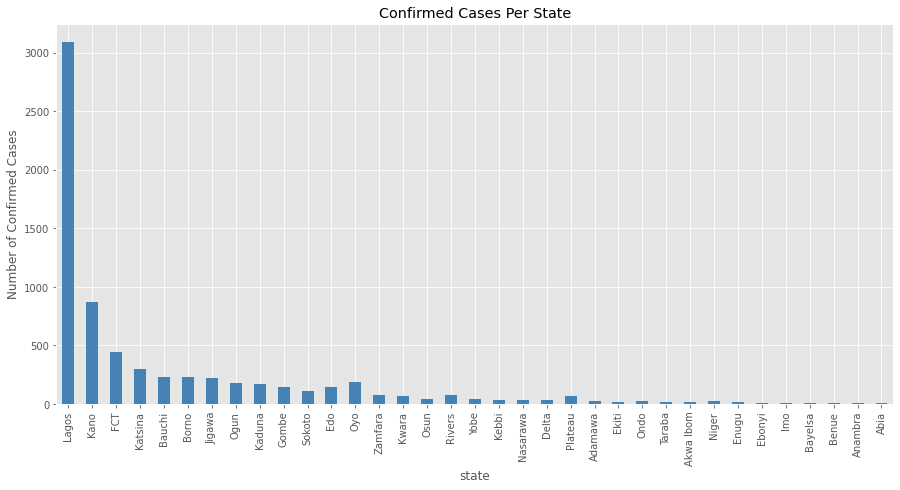

In [217]:
df_state = df['confirm_cases']
df_state.plot(kind='bar', figsize=(15, 7), color='steelblue')

plt.xlabel('state') # add to x-label to the plot
plt.ylabel('Number of Confirmed Cases') # add y-label to the plot
plt.title('Confirmed Cases Per State') # add title to the plot

plt.show()

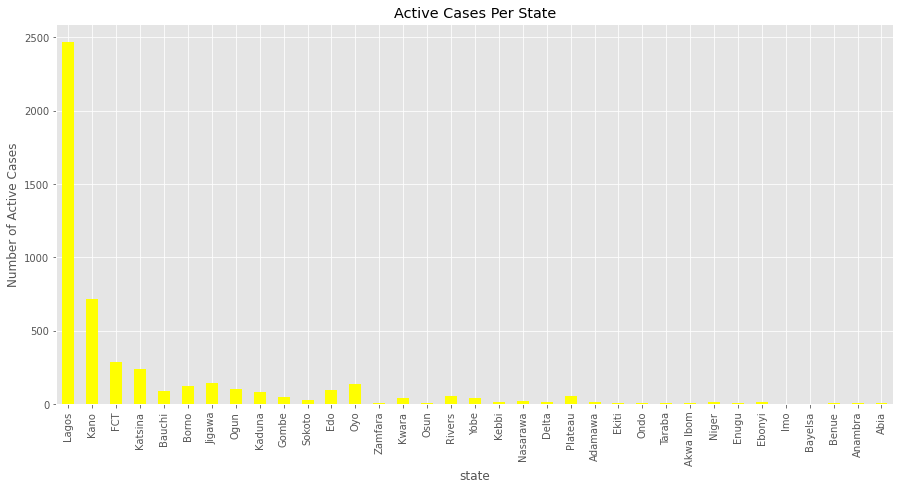

In [218]:
df_state = df['on_admission']
df_state.plot(kind='bar', figsize=(15, 7), color='yellow')

plt.xlabel('state') # add to x-label to the plot
plt.ylabel('Number of Active Cases') # add y-label to the plot
plt.title('Active Cases Per State') # add title to the plot

plt.show()

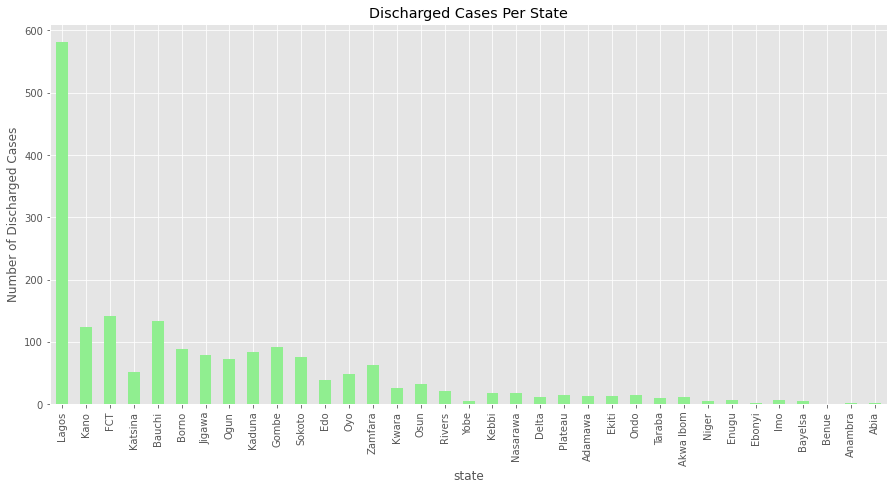

In [219]:
df_state = df['discharged']
df_state.plot(kind='bar', figsize=(15, 7), color='lightgreen')

plt.xlabel('state') # add to x-label to the plot
plt.ylabel('Number of Discharged Cases') # add y-label to the plot
plt.title('Discharged Cases Per State') # add title to the plot

plt.show()

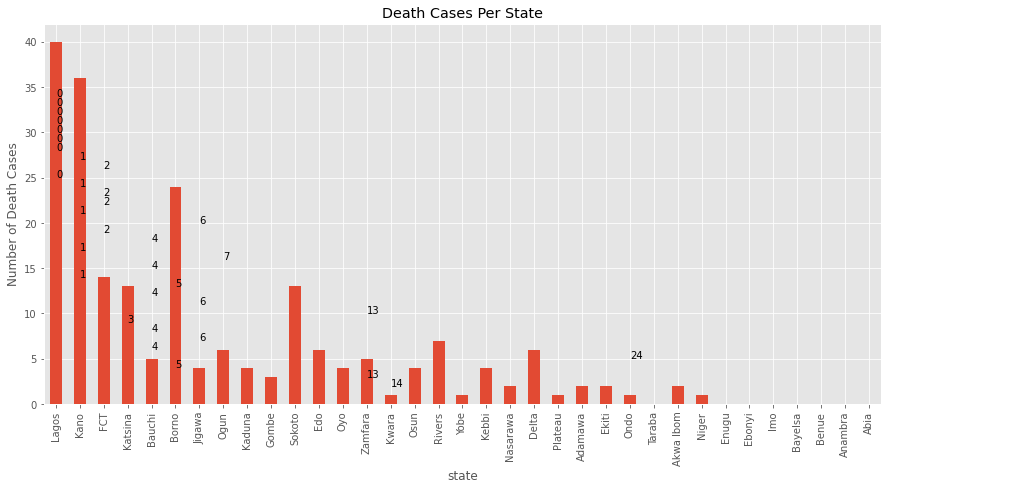

In [220]:
df_state = df['deaths']
df_state.plot(kind='bar', figsize=(15, 7))

plt.xlabel('state') # add to x-label to the plot
plt.ylabel('Number of Death Cases') # add y-label to the plot
plt.title('Death Cases Per State') # add title to the plot

# annotate value labels to each country
for index, value in enumerate(df_state): 
    label = format(int(value), ',') # format int with commas
    
    # place text at the end of bar (subtracting 47000 from x, and 0.1 from y to make it fit within the bar)
    plt.annotate(label, xy=(value , index), color='black')

plt.show()

In [221]:

# transpose the dataframe
df_count = df.transpose()
df_count.drop(index=['confirm_cases','X','Y','id','Total'], inplace=True)
df_count.head()

state,Lagos,Kano,FCT,Katsina,Bauchi,Borno,Jigawa,Ogun,Kaduna,Gombe,...,Taraba,Akwa Ibom,Niger,Enugu,Ebonyi,Imo,Bayelsa,Benue,Anambra,Abia
on_admission,2471.0,716.0,290.0,239.0,90.0,122.0,143.0,104.0,82.0,49.0,...,8.0,4.0,16.0,10.0,12.0,0.0,2.0,5.0,4.0,6.0
discharged,582.0,123.0,142.0,51.0,133.0,89.0,78.0,73.0,84.0,92.0,...,10.0,12.0,5.0,6.0,1.0,7.0,5.0,0.0,1.0,1.0
deaths,40.0,36.0,14.0,13.0,5.0,24.0,4.0,6.0,4.0,3.0,...,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [222]:
col_list = list(df_count)

# Add total column.
df_count['Total'] = df_count[col_list].sum(axis=1)

# let's rename the columns so that they make sense
df_count.rename(index={'on_admission':'Active Cases',
                         'discharged':'Dischaged Case', 'deaths':'Death Cases'}, inplace=True)

# let's view the first five elements and see how the dataframe was changed
df_count.head()

state,Lagos,Kano,FCT,Katsina,Bauchi,Borno,Jigawa,Ogun,Kaduna,Gombe,...,Akwa Ibom,Niger,Enugu,Ebonyi,Imo,Bayelsa,Benue,Anambra,Abia,Total
Active Cases,2471.0,716.0,290.0,239.0,90.0,122.0,143.0,104.0,82.0,49.0,...,4.0,16.0,10.0,12.0,0.0,2.0,5.0,4.0,6.0,4898.0
Dischaged Case,582.0,123.0,142.0,51.0,133.0,89.0,78.0,73.0,84.0,92.0,...,12.0,5.0,6.0,1.0,7.0,5.0,0.0,1.0,1.0,1907.0
Death Cases,40.0,36.0,14.0,13.0,5.0,24.0,4.0,6.0,4.0,3.0,...,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,211.0


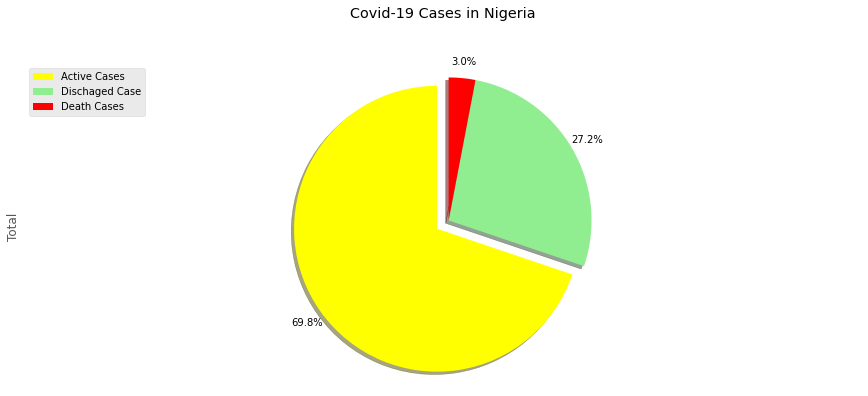

In [223]:
colors_list = ['yellow', 'lightgreen', 'red']
explode_list = [0.1, 0, 0] # ratio for each cases with which to offset each wedge.

df_count['Total'].plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,         # turn off labels on pie chart
                            pctdistance=1.12,    # the ratio between the center of each pie slice and the start of the text generated by autopct 
                            colors=colors_list,  # add custom colors
                            explode=explode_list # 'explode' lowest 3 continents
                            )

# scale the title up by 12% to match pctdistance
plt.title('Covid-19 Cases in Nigeria', y=1.12) 

plt.axis('equal') 

# add legend
plt.legend(labels=df_count.index, loc='upper left') 

plt.show()